In [2]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to your zip file
zip_path = '/content/drive/MyDrive/Flickr8k.zip'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/Flickr8k')

# Change directory to the extracted dataset
os.chdir('/content/Flickr8k')



Mounted at /content/drive


In [3]:
import pandas as pd
import os

# Assuming dataset_path is defined earlier
dataset_path = '/content/Flickr8k'  # Adjust this path as per your dataset location

# Read the captions file into a Pandas DataFrame
captions_path = os.path.join(dataset_path, 'captions.txt')
df = pd.read_csv(captions_path, sep=',', header=None,  names=['image', 'caption'], nrows=1000)

# Display the first few rows of the DataFrame
print(df.head())


                       image  \
0                      image   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   

                                             caption  
0                                            caption  
1  A child in a pink dress is climbing up a set o...  
2              A girl going into a wooden building .  
3   A little girl climbing into a wooden playhouse .  
4  A little girl climbing the stairs to her playh...  


In [4]:
import string
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove links
    text = re.sub(r'http\S+', '', text)
    # Remove next lines
    text = text.replace('\n', ' ')
    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove special characters
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Stemming and Lemmatization
    text = ' '.join([ps.stem(lemmatizer.lemmatize(word)) for word in text.split()])
    return text

# Apply the preprocessing to the captions
df['caption'] = df['caption'].apply(preprocess_text)

# Display the first few rows of the DataFrame after preprocessing
print(df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                       image                                     caption
0                      image                                     caption
1  1000268201_693b08cb0e.jpg  child pink dress climb set stair entri way
2  1000268201_693b08cb0e.jpg                        girl go wooden build
3  1000268201_693b08cb0e.jpg            littl girl climb wooden playhous
4  1000268201_693b08cb0e.jpg             littl girl climb stair playhous


In [5]:
df['image']

0                          image
1      1000268201_693b08cb0e.jpg
2      1000268201_693b08cb0e.jpg
3      1000268201_693b08cb0e.jpg
4      1000268201_693b08cb0e.jpg
                 ...            
995    1240297429_c36ae0c58f.jpg
996     124195430_d14028660f.jpg
997     124195430_d14028660f.jpg
998     124195430_d14028660f.jpg
999     124195430_d14028660f.jpg
Name: image, Length: 1000, dtype: object

In [7]:
# Save the new captions to a text file
new_captions_path = os.path.join(dataset_path, 'preprocessed_captions.txt')
df.to_csv(new_captions_path, sep='\t', index=False, header=False)


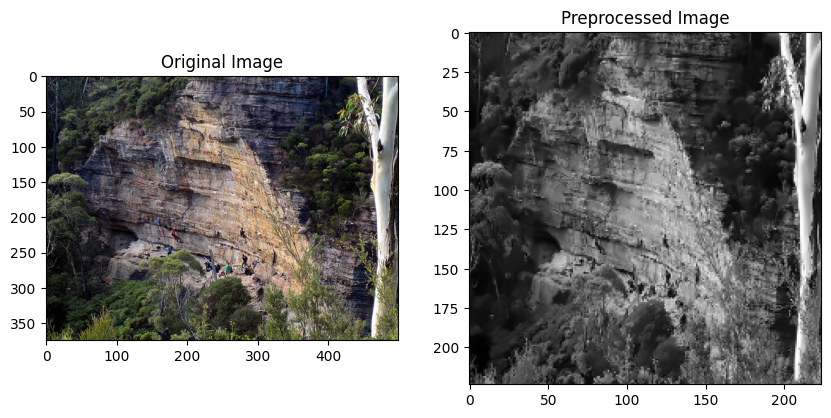

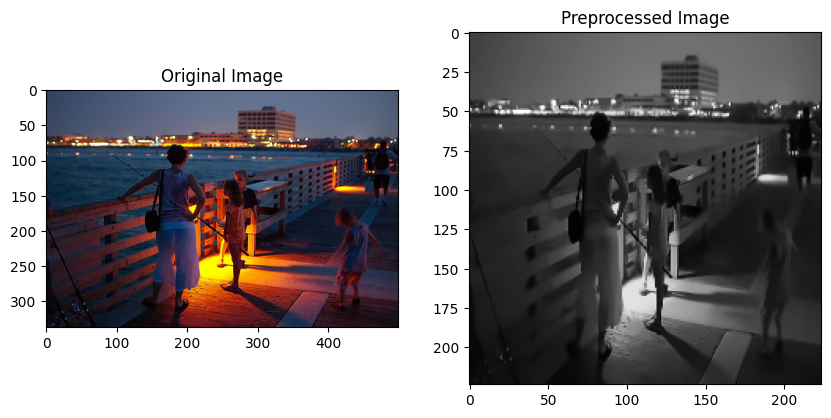

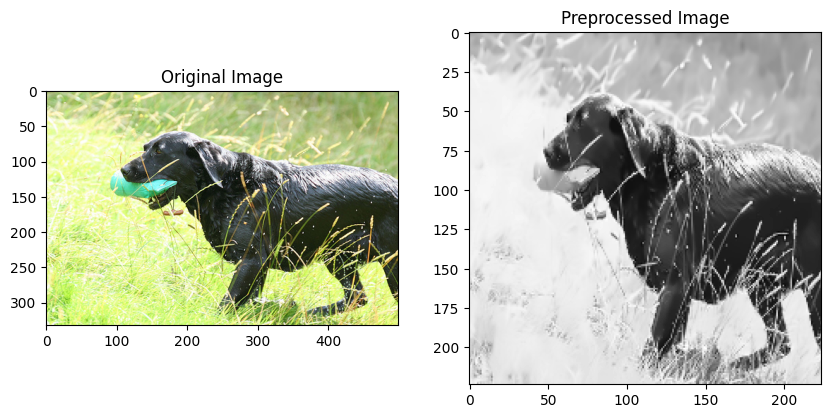

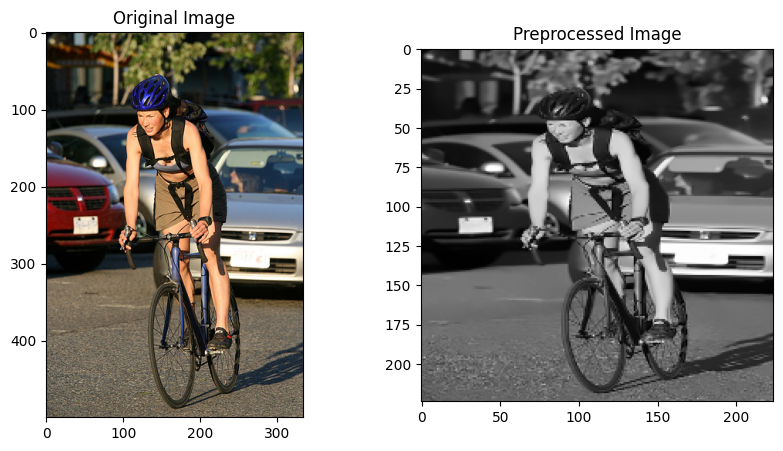

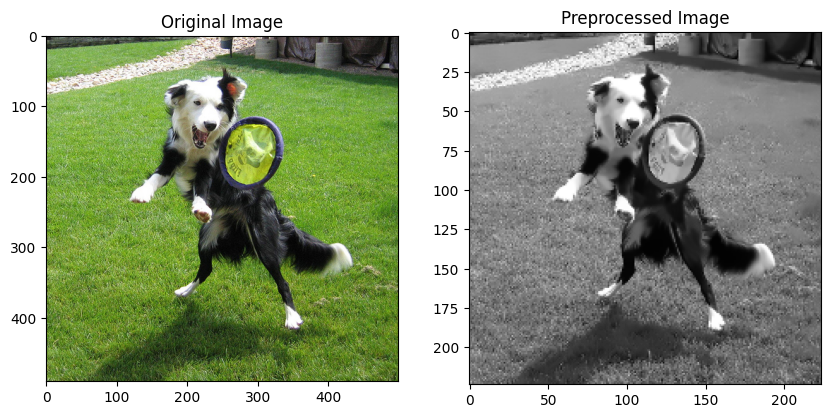

In [8]:
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt

# Function to perform image preprocessing
def preprocess_image(image_path):
    try:

        # Read the image
        image = cv2.imread(image_path)
        # Convert to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Denoising
        denoised_image = cv2.fastNlMeansDenoising(gray_image, None, 10, 7, 21)
        # Resizing to  a fixed size
        resized_image = cv2.resize(denoised_image, (224, 224))
        # Normalizing the pixel values to [0, 1]
        normalized_image = resized_image / 255.0

        return normalized_image

    except Exception as e:
        return None

# Function to preprocess images based on the preprocessed captions DataFrame
def preprocess_images_from_captions(dataset_path, save_path, df):
    # Create the directory to save preprocessed images if it doesn't exist
    if not os.path.exists(os.path.join(save_path, 'preprocessed_data')):
        os.makedirs(os.path.join(save_path, 'preprocessed_data'))

    image_files = df['image'].tolist()
    for file in image_files:
        image_path = os.path.join(dataset_path, 'Images', file)
        preprocessed_image_path = os.path.join(save_path, 'preprocessed_data', file)
        preprocessed_image = preprocess_image(image_path)
        if preprocessed_image is not None:
            # Save preprocessed image
            cv2.imwrite(preprocessed_image_path, (preprocessed_image * 255).astype(np.uint8))

# Display random images before and after preprocessing
def display_images(dataset_path, save_path, df, num_images=5):
    random_images = random.sample(df['image'].tolist(), num_images)
    for file in random_images:
        image_path = os.path.join(dataset_path, 'Images', file)
        preprocessed_image_path = os.path.join(save_path, 'preprocessed_data', file)

        # Original Image
        original_image = cv2.imread(image_path)

        # Preprocessed Image
        preprocessed_image = preprocess_image(image_path)

        if preprocessed_image is not None:
            # Display side by side
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
            plt.title('Original Image')

            plt.subplot(1, 2, 2)
            plt.imshow(preprocessed_image, cmap='gray')
            plt.title('Preprocessed Image')
            plt.show()

# Define paths
dataset_path = '/content/Flickr8k'
save_path = '/content/Preprocessed'

# Assuming df is your preprocessed captions DataFrame
# Preprocess and save images based on the captions DataFrame
preprocess_images_from_captions(dataset_path, save_path, df)

# Display images before and after preprocessing
display_images(dataset_path, save_path, df, num_images=5)

In [9]:
import os
import shutil
import random
import pandas as pd

# Paths
preprocessed_data_path = '/content/Preprocessed/preprocessed_data'
captions_path = '/content/Flickr8k/preprocessed_captions.txt'
train_path = '/content/Preprocessed/train'
val_path = '/content/Preprocessed/validation'
test_path = '/content/Preprocessed/test'

# Create directories if they don't exist
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Read the captions file into a Pandas DataFrame
df = pd.read_csv(captions_path, sep='\t', header=None, names=['image', 'caption'])

# Remove the header row if it exists
if df.iloc[0]['image'] == 'image' and df.iloc[0]['caption'] == 'caption':
    df = df.drop(0)

print("Initial DataFrame shape:", df.shape)
print("Initial DataFrame head:\n", df.head())

# Verify that all images in the DataFrame exist in the preprocessed_data directory
existing_images = {f for f in os.listdir(preprocessed_data_path) if os.path.isfile(os.path.join(preprocessed_data_path, f))}
print(f"Number of existing images in preprocessed_data_path: {len(existing_images)}")
print(f"Sample existing images: {list(existing_images)[:5]}")

# Check for missing images in the DataFrame and add them back to the preprocessed_data directory
missing_images = df[~df['image'].isin(existing_images)]
print("Missing images in DataFrame:\n", missing_images)

# Copy missing images back to the preprocessed_data directory
for _, row in missing_images.iterrows():
    image = row['image']
    src_path = os.path.join(dataset_path, 'Images', image)  # Assuming original image directory structure
    dest_path = os.path.join(preprocessed_data_path, image)
    try:
        shutil.copy(src_path, dest_path)
        existing_images.add(image)  # Update existing images set
    except Exception as e:
        print(f"Failed to copy {image} to {preprocessed_data_path}: {e}")

# Filter the DataFrame to only include existing images
df = df[df['image'].isin(existing_images)]

print("Filtered DataFrame shape:", df.shape)
print("Filtered DataFrame head:\n", df.head())

# Group by image to ensure each image and its captions stay together
grouped = df.groupby('image')['caption'].apply(list).reset_index()

print("Grouped DataFrame shape:", grouped.shape)
print("Grouped DataFrame head:\n", grouped.head())

# Shuffle the grouped DataFrame
grouped = grouped.sample(frac=1).reset_index(drop=True)

# Define split proportions
train_split = 0.7
val_split = 0.2
test_split = 0.1

# Calculate split sizes
num_total = len(grouped)
num_train = int(train_split * num_total)
num_val = int(val_split * num_total)
num_test = num_total - num_train - num_val

# Split into train, val, and test sets
train_df = grouped[:num_train]
val_df = grouped[num_train:num_train + num_val]
test_df = grouped[num_train + num_val:]

print("Number of training images:", len(train_df))
print("Number of validation images:", len(val_df))
print("Number of test images:", len(test_df))

# Function to move images and save captions
def move_images_and_save_captions(grouped_df, dest_path):
    captions = []
    for _, row in grouped_df.iterrows():
        image, image_captions = row['image'], row['caption']
        src_path = os.path.join(preprocessed_data_path, image)
        dest_image_path = os.path.join(dest_path, image)
        try:
            shutil.move(src_path, dest_image_path)
            for caption in image_captions:
                captions.append(f"{image}\t{caption}")
        except Exception as e:
            print(f"Failed to move {image} to {dest_path} directory: {e}")
    return captions

# Move images and save captions
train_captions = move_images_and_save_captions(train_df, train_path)
val_captions = move_images_and_save_captions(val_df, val_path)
test_captions = move_images_and_save_captions(test_df, test_path)

# Debugging to verify the number of captions moved
print("Number of train captions:", len(train_captions))
print("Number of validation captions:", len(val_captions))
print("Number of test captions:", len(test_captions))

# Save captions to files
with open(os.path.join(train_path, 'captions.txt'), 'w') as f:
    f.write("\n".join(train_captions))

with open(os.path.join(val_path, 'captions.txt'), 'w') as f:
    f.write("\n".join(val_captions))

with open(os.path.join(test_path, 'captions.txt'), 'w') as f:
    f.write("\n".join(test_captions))

# Verify the splits
print(f"Number of training images: {len(os.listdir(train_path)) - 1}")  # Subtracting 1 for the captions file
print(f"Number of validation images: {len(os.listdir(val_path)) - 1}")  # Subtracting 1 for the captions file
print(f"Number of test images: {len(os.listdir(test_path)) - 1}")  # Subtracting 1 for the captions file

# Verify the captions
train_captions_path = os.path.join(train_path, 'captions.txt')
val_captions_path = os.path.join(val_path, 'captions.txt')
test_captions_path = os.path.join(test_path, 'captions.txt')

num_train_captions = sum(1 for line in open(train_captions_path))
num_val_captions = sum(1 for line in open(val_captions_path))
num_test_captions = sum(1 for line in open(test_captions_path))

print(f"Number of training captions: {num_train_captions}")
print(f"Number of validation captions: {num_val_captions}")
print(f"Number of test captions: {num_test_captions}")


Initial DataFrame shape: (999, 2)
Initial DataFrame head:
                        image                                     caption
1  1000268201_693b08cb0e.jpg  child pink dress climb set stair entri way
2  1000268201_693b08cb0e.jpg                        girl go wooden build
3  1000268201_693b08cb0e.jpg            littl girl climb wooden playhous
4  1000268201_693b08cb0e.jpg             littl girl climb stair playhous
5  1000268201_693b08cb0e.jpg       littl girl pink dress go wooden cabin
Number of existing images in preprocessed_data_path: 200
Sample existing images: ['101669240_b2d3e7f17b.jpg', '103205630_682ca7285b.jpg', '1130369873_d80a1aa59c.jpg', '1151466868_3bc4d9580b.jpg', '1022454428_b6b660a67b.jpg']
Missing images in DataFrame:
 Empty DataFrame
Columns: [image, caption]
Index: []
Filtered DataFrame shape: (999, 2)
Filtered DataFrame head:
                        image                                     caption
1  1000268201_693b08cb0e.jpg  child pink dress climb set stair

In [10]:
import os
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Paths
dataset_path = '/content/Flickr8k'
preprocessed_path = '/content/Preprocessed'
train_path = os.path.join(preprocessed_path, 'train')
val_path = os.path.join(preprocessed_path, 'validation')
test_path = os.path.join(preprocessed_path, 'test')

# Load preprocessed captions
captions_path = os.path.join(dataset_path, 'preprocessed_captions.txt')
df = pd.read_csv(captions_path, sep='\t', header=None, names=['image', 'caption'])

# Split into train, validation, test sets
train_df = df[df['image'].str.startswith('train')]
val_df = df[df['image'].str.startswith('val')]
test_df = df[df['image'].str.startswith('test')]

# Function to preprocess images
def preprocess_image(image_path):
    try:
        # Read image
        image = cv2.imread(image_path)
        # Resize to (224, 224) and normalize
        image = cv2.resize(image, (224, 224))
        image = image / 255.0  # Normalize pixel values
        return image
    except Exception as e:
        print(f"Error preprocessing image {image_path}: {e}")
        return None

# Function to generate data batches
def generate_data(df, image_dir, tokenizer, max_length, batch_size=32):
    image_paths = [os.path.join(image_dir, img) for img in df['image']]
    captions = df['caption'].tolist()
    num_samples = len(df)

    while True:
        for offset in range(0, num_samples, batch_size):
            batch_images = []
            batch_captions = []

            for i in range(offset, min(offset+batch_size, num_samples)):
                image_path = image_paths[i]
                image = preprocess_image(image_path)
                if image is not None:
                    batch_images.append(image)
                    caption = captions[i]
                    batch_captions.append(caption)

            # Tokenize captions
            sequences = tokenizer.texts_to_sequences(batch_captions)
            X_captions = pad_sequences(sequences, maxlen=max_length, padding='post')

            yield np.array(batch_images), X_captions


In [11]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model

# Define CNN model for feature extraction
def create_cnn_model():
    base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    for layer in base_model.layers:
        layer.trainable = False  # Freeze layers

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)

    cnn_model = Model(inputs=base_model.input, outputs=x)

    return cnn_model

# Create instance of CNN model
cnn_model = create_cnn_model()
cnn_model.summary()

16705208/16705208 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     

Max sequence length: 18
Average sequence length: 6.239


<Axes: >

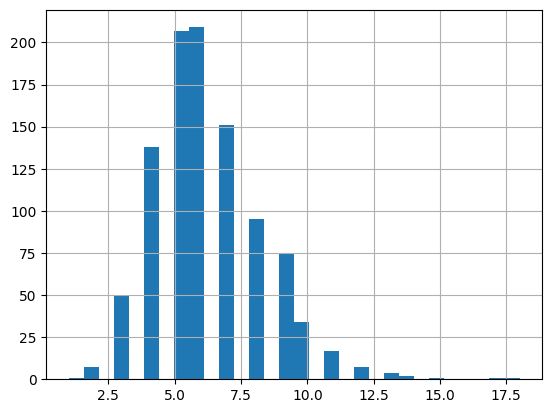

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

# Assuming df is your DataFrame with preprocessed captions
captions = df['caption'].tolist()

# Tokenize captions
tokenizer = Tokenizer()
tokenizer.fit_on_texts(captions)
sequences = tokenizer.texts_to_sequences(captions)

# Determine max sequence length
sequence_lengths = [len(seq) for seq in sequences]
max_length = max(sequence_lengths)
average_length = sum(sequence_lengths) / len(sequence_lengths)

print(f"Max sequence length: {max_length}")
print(f"Average sequence length: {average_length}")

# Optionally, visualize distribution of sequence lengths
pd.Series(sequence_lengths).hist(bins=30)


In [13]:
# Assuming tokenizer is already fitted on captions
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for <unk> or out-of-vocabulary token
print(f"Vocabulary size: {vocab_size}")


Vocabulary size: 927


In [14]:
from tensorflow.keras.layers import Embedding, LSTM, Input, Dense, Concatenate

# Define LSTM model for caption generation
def create_lstm_model(max_length, vocab_size):
    embedding_dim = 256
    lstm_units = 512

    caption_input = Input(shape=(max_length,))
    embedded_input = Embedding(vocab_size, embedding_dim, mask_zero=True)(caption_input)
    lstm_output = LSTM(lstm_units)(embedded_input)
    lstm_model = Model(inputs=caption_input, outputs=lstm_output)

    return lstm_model

# Create instance of LSTM model
max_length = 20  # Example, adjust as per your tokenizer and captions
vocab_size = len(tokenizer.word_index) + 1  # Example, adjust as per your tokenizer
lstm_model = create_lstm_model(max_length, vocab_size)


In [15]:
from tensorflow.keras.layers import Concatenate, Dense

# Combine CNN and LSTM models
def create_combined_model(cnn_model, lstm_model):
    cnn_output = cnn_model.output
    lstm_input = Input(shape=(max_length,))

    combined_input = Concatenate()([cnn_output, lstm_input])
    x = Dense(512, activation='relu')(combined_input)
    outputs = Dense(vocab_size, activation='softmax')(x)

    combined_model = Model(inputs=[cnn_model.input, lstm_input], outputs=outputs)

    return combined_model

# Create combined model
combined_model = create_combined_model(cnn_model, lstm_model)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Compile combined model with accuracy metric
combined_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Example usage with data generators
batch_size = 32

# Calculate steps per epoch for training and validation
train_steps_per_epoch = len(train_df) // batch_size if len(train_df) > batch_size else 1
val_steps_per_epoch = len(val_df) // batch_size if len(val_df) > batch_size else 1

# Generate data using data generators
train_generator = generate_data(train_df, train_path, tokenizer, max_length, batch_size=batch_size)
val_generator = generate_data(val_df, val_path, tokenizer, max_length, batch_size=batch_size)

# Train the model with early stopping and monitor accuracy
epochs = 10
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    # Training
    train_history = combined_model.fit(train_generator,
                                       steps_per_epoch=train_steps_per_epoch,
                                       epochs=1,  # Train for 1 epoch per loop iteration
                                       validation_data=val_generator,
                                       validation_steps=val_steps_per_epoch,
                                       callbacks=[early_stopping],
                                       verbose=1)

    # Print training metrics for each step
    train_loss = train_history.history['loss'][0]
    train_accuracy = train_history.history['accuracy'][0]
    val_loss = train_history.history['val_loss'][0]
    val_accuracy = train_history.history['val_accuracy'][0]

    print(f"  Train - loss: {train_loss:.4f} - accuracy: {train_accuracy:.4f}")
    print(f"  Validation - loss: {val_loss:.4f} - accuracy: {val_accuracy:.4f}")


Epoch 1/10


In [ ]:
# Save the model
model_save_path = '/content/drive/MyDrive/Image Captioning.h5'
combined_model.save(model_save_path)
print(f"Model saved at {model_save_path}")